# **Experiment Notebook**



In [218]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [219]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import altair as alt

---
## A. Project Description


In [221]:
student_name = "Fang Yee Tan"
student_id = "25677648"

In [222]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [223]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## C. Data Understanding

### C.1   Load Datasets


In [224]:
from pathlib import Path
file_path = Path.home() / "Desktop" / "36120" / "Assignment2"

X_train = pd.read_csv(file_path / "X_train.csv")
X_val = pd.read_csv(file_path / "X_val.csv")
X_test = pd.read_csv(file_path / "X_test.csv")
y_train = pd.read_csv(file_path / "y_train.csv").squeeze()
y_val = pd.read_csv(file_path / "y_val.csv").squeeze()
y_test = pd.read_csv(file_path / "y_test.csv").squeeze()

---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [225]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [226]:
# Critical Success Index (CSI)
def critical_success_index(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    csi = tp / (tp + fp + fn)
    return csi

In [227]:
performance_metrics_explanations = """Accuracy measures how well the model correctly predicts both rain and no-rain cases, providing an overall view of performance. However, due to the dataset’s imbalance, precision, recall, and F1-score offer more meaningful insights. In this project, the F1-score is the primary metric because it balances precision and recall, which is essential when both false positives and false negatives have significant impacts. The confusion matrix further breaks down prediction results into true positives, true negatives, false positives, and false negatives, giving a clearer picture of the model’s strengths and weaknesses. Additionally, the Critical Success Index (CSI) is introduced to assess forecast skill specifically in meteorological contexts. Together, these metrics provide a comprehensive evaluation of model effectiveness."""

In [228]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

Null hypothesis: The performance of XGBoost is not significantly better than that of the baseline Logistic Regression model.

Alternative hypothesis: The XGBoost demonstrates statistically significant improvement in performance compared to the baseline Logistic Regression model.

### J.1 Import Algorithm


In [229]:
!pip install xgboost

In [230]:
import xgboost
from xgboost import XGBClassifier

In [231]:
y_train.value_counts()

rain_or_not
0    3343
1    1403
Name: count, dtype: int64

In [232]:
scale_pos_weight = 3343 / 1403
scale_pos_weight

2.382751247327156

In [233]:
model = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=2.38,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=16
)

In [234]:
algorithm_selection_explanations = """XGBoost is considered a good fit because it focuses on misclassified instances by sequentially adding weak learners to the ensemble, thereby improving accuracy over iterations. It also offers a wide range of hyperparameters that can be tuned to capture complex relationships in the data."""

In [235]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

In [236]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [237]:
param_grid = {
    'learning_rate': [0.01],
    'n_estimators': [500],
    'max_depth': [2],
    'subsample': [0.5],
    'colsample_bytree': [0.4],
    'min_child_weight': [10]
}

In [238]:
# Time series cross validation
tscv = TimeSeriesSplit(n_splits=5)

# Grid search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=tscv,
    scoring='f1',
    n_jobs=-1,
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1 score: {grid_search.best_score_:.4f}")

/Users/fangyeetan/.pyenv/versions/3.11.4/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:25:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/fangyeetan/.pyenv/versions/3.11.4/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:25:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/fangyeetan/.pyenv/versions/3.11.4/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:25:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/fangyeetan/.pyenv/versions/3.11.4/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:25:05] WARNING: /Users/runner/work/xgboost/xgboost/


Best parameters: {'colsample_bytree': 0.4, 'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 10, 'n_estimators': 500, 'subsample': 0.5}
Best cross-validation F1 score: 0.3691


In [239]:
hyperparameters_selection_explanations = """The n_estimators parameter determines how many trees are used in the ensemble, directly influencing the model’s ability to capture patterns in the data. The learning_rate controls how much each tree contributes to the final prediction, with lower values slow the learning process but help prevent overfitting. The max_depth parameter sets a limit on how deep each tree can grow, helping to control model complexity and reduce the risk of learning from noise. Parameters such as subsample and colsample_bytree introduce randomness by restricting the fraction of training instances and features used for each tree, which enhances the model’s generalisation ability and mitigates overfitting. Lastly, min_child_weight specifies the minimum sum of instance weights required in a leaf node, acting as a form of regularisation that prevents the model from capturing overly specific patterns in the data."""

In [240]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [241]:
best_model = grid_search.best_estimator_

### J.4 Model Technical Performance

In [242]:
# Predict on validation dataset
y_val_pred = best_model.predict(X_val)

In [243]:
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
csi_score = critical_success_index(y_val, y_val_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Critical Success Index (CSI): {csi_score:.2f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

Accuracy: 0.62
Precision: 0.45
Recall: 0.65
F1 Score: 0.53
Critical Success Index (CSI): 0.36

Confusion Matrix:
[[151  96]
 [ 41  77]]


In [244]:
# Predict on testing dataset
y_test_pred = best_model.predict(X_test)

In [245]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
csi_score = critical_success_index(y_test, y_test_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Critical Success Index (CSI): {csi_score:.2f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Accuracy: 0.51
Precision: 0.38
Recall: 0.56
F1 Score: 0.45
Critical Success Index (CSI): 0.29

Confusion Matrix:
[[112 117]
 [ 57  72]]


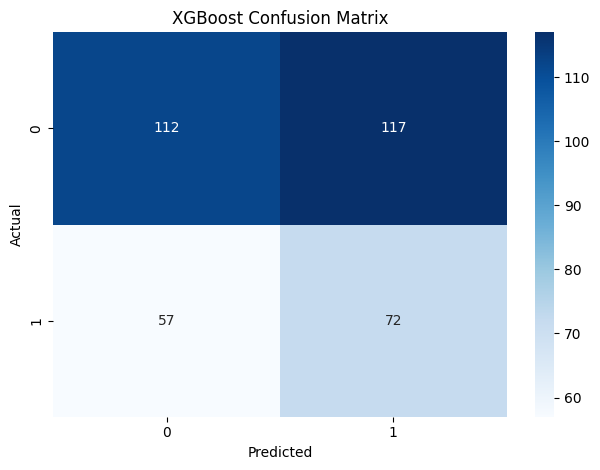

In [246]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure()
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues', fmt = 'd')

plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

In [247]:
# Extract feature importance using gain
booster = best_model.get_booster()
importance_dict = booster.get_score(importance_type='gain')

# Map feature indices (like f0, f1) to actual column names
feature_map = {f"f{i}": col for i, col in enumerate(X_train.columns)}
importance_df = pd.DataFrame({
    'Feature': [feature_map.get(k, k) for k in importance_dict.keys()],
    'Importance': list(importance_dict.values())
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
7,wet_bulb_temperature_2m_mean,21.366077
6,dew_point_2m_mean,20.211880
20,rain_occurred,17.056143
12,temperature_2m_mean,16.513506
32,month_3,16.355570
37,month_8,15.729486
14,wind_speed_10m_max,15.296603
31,month_2,14.890553
17,pressure_range,14.262694
4,wind_gusts_10m_mean,13.516277


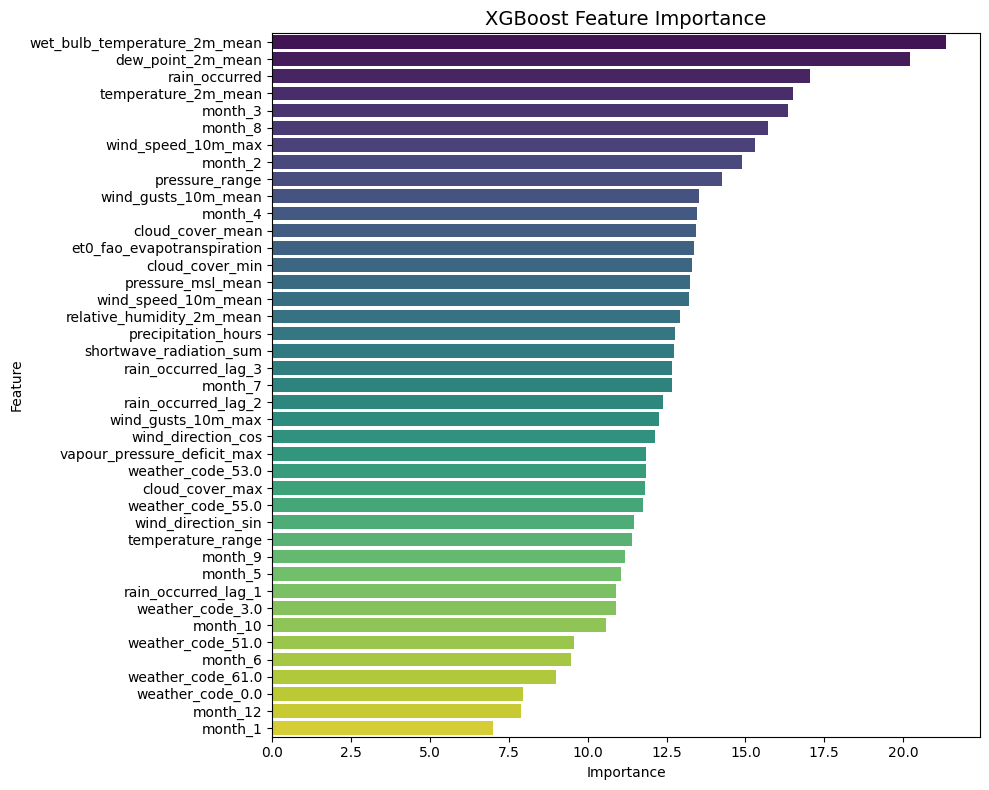

In [248]:
# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('XGBoost Feature Importance', fontsize=14)
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [249]:
model_performance_explanations = """The model’s performance shows a clear decline when moving from the validation to the testing dataset. Recall decreases from 0.65 to 0.56, and the F1 score falls from 0.53 to 0.45, indicating reduced ability to correctly identify rain events on unseen data. Additionally, the model produces a high number of false positives, often predicting rainfall when it does not occur, which affects its overall precision.
"""

In [250]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [251]:
business_impacts_explanations = """The model’s relatively high recall suggests it successfully detects most rain events, which aligns with the core business objective of issuing timely weather alerts. However, a high rate of false positives leads to unnecessary warnings, potentially causing avoidable cancellations and preparations. While false negatives (failing to predict actual rain) pose more significant consequences due to safety concerns and public disruption, the model’s moderate recall and declining performance on the testing dataset raise concerns about its reliability. Therefore, although the model offers partial support for the business goal, improving precision is essential to reduce false alarms and maintain public trust. Additionally, further refinement is needed to address overfitting and enhance generalisation to unseen data."""

In [252]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [253]:
experiment_outcome = """Hypothesis Confirmed"""

In [254]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [255]:
experiment_results_explanations = """Compared to the baseline logistic regression model, the XGBoost model does not show improved performance in terms of accuracy, precision, recall or F1 score. This supports the null hypothesis that the more complex model does not offer a significant advantage over the simpler baseline. However, the experiment provides valuable insights. Feature importance analysis shows that several input variables contribute minimally to the model’s predictions, suggesting that the model may be influenced by noise from irrelevant features. Additionally, the high number of false positives highlights the need to better manage class imbalance, potentially by tuning parameters such as scale_pos_weight. These findings justify continued experimentation rather than abandoning the current approach. The next steps include removing low-importance features to improve generalisation and adjusting class weighting to reduce false positives. These refinements aim to improve the model's reliability and better align its predictions with the business objective of delivering timely and accurate rainfall alerts."""

In [256]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)